In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact
import string



plt.rcParams['figure.figsize']= (15, 5)
plt.style.use('fivethirtyeight')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugsdatabase/drug.csv


In [2]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
#Reading Dataset
data = pd.read_csv('/kaggle/input/drugsdatabase/drug.csv')
#lets print the shape of the dataset
print("The shape of the dataset: ", data.shape)


The shape of the dataset:  (161297, 7)


In [4]:
data.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
#Lets explore some of the important column in the dataset

print("Number of Unique Drugs present in the Dataset :",data['drugName'].nunique())
print("Number of Unique Medical Conditions in the Dataset :",data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :",data['date'].min())
print("Ending Date :",data['date'].max())

Number of Unique Drugs present in the Dataset : 3436
Number of Unique Medical Conditions in the Dataset : 884

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


In [6]:
#sumarize the dataset
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [7]:
#lets check the number and name of the drugs with 0 useful count in details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The number of drugs with no useful count :", data[data['usefulCount'] == 0].count()[0])

#lets check the number of drugs with no useful count with review greater than or equal to 8
print("Number of good drugs with lesser useful count :", data[(data['usefulCount'] == 0) &
      data['rating'] >= 8].count()[0])
#lets check the average rating of the drugs with no useful count
print("\nName and Condition of these Drugs: \n\n",
     data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop=True))

Analysis on Useless Drugs
----------------------------
The number of drugs with no useful count : 6318
Number of good drugs with lesser useful count : 0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


/tmp/ipykernel_17/1348548182.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The number of drugs with no useful count :", data[data['usefulCount'] == 0].count()[0])
/tmp/ipykernel_17/1348548182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of good drugs with lesser useful count :", data[(data['usefulCount'] == 0) &


In [8]:
#lets summarize categorical data also
data[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [9]:
#lets check for Missing Values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [10]:
# as we know that condition is an important column, so we will delete all the records where condition is nill()
data= data.dropna()
#lets check the Missing values now
data.isnull().sum().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


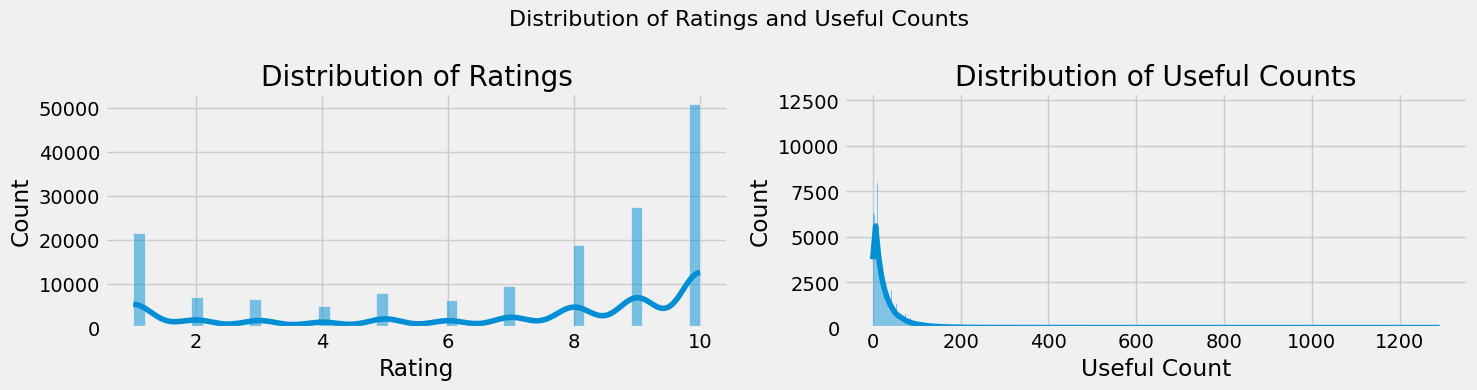

In [11]:
# Set the figure size
plt.figure(figsize=(15, 4))

# Plot the distribution of ratings
plt.subplot(1, 2, 1)
sns.histplot(data['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot the distribution of useful counts
plt.subplot(1, 2, 2)
sns.histplot(data['usefulCount'], kde=True)
plt.title('Distribution of Useful Counts')
plt.xlabel('Useful Count')
plt.ylabel('Count')

plt.suptitle('Distribution of Ratings and Useful Counts', fontsize=16)
plt.tight_layout()
plt.show()


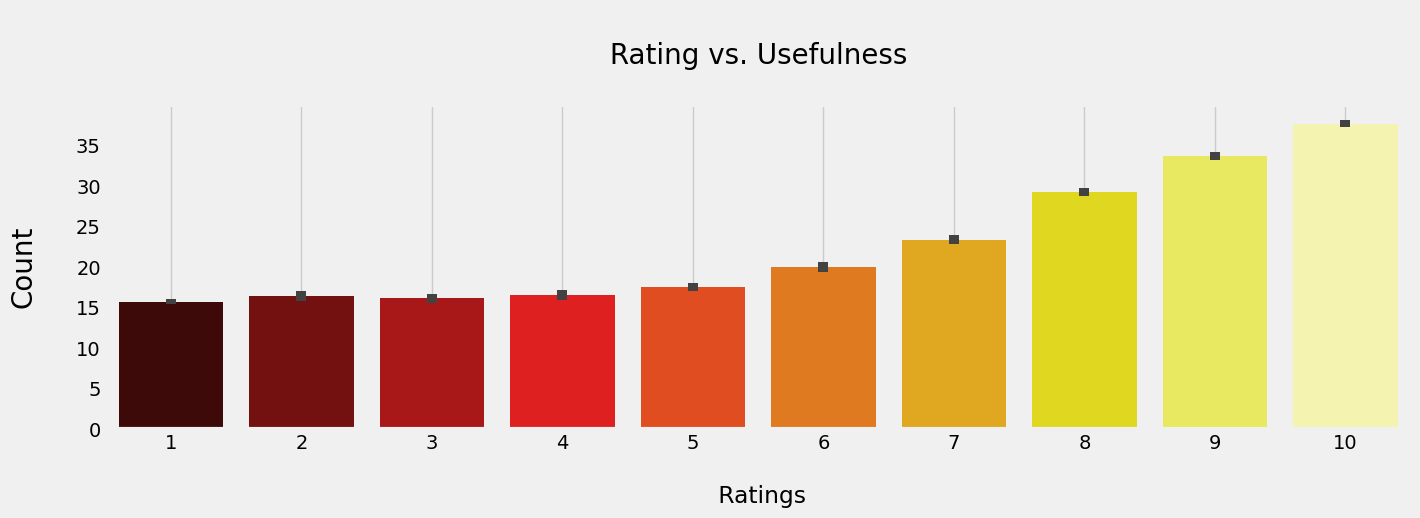

In [12]:
# Assuming you have a DataFrame named 'data' with 'rating' and 'usefulCount' columns

# Set the figure size
plt.figure(figsize=(15, 4))

# Bar plot of ratings vs. useful count
sns.barplot(x='rating', y='usefulCount', data=data, palette='hot')

# Customize plot elements
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize=20)
plt.title('\n Rating vs. Usefulness \n', fontsize=20)
plt.show()

In [13]:
#checking whether Length of Review has any impact on ratings of the drugs

#for that we need to create a new column to calculate length of the reviews
data['len'] = data['review'].apply(len)

In [14]:
#lets check the impact of length of reviews on ratings
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])


len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [15]:
def punctuation_removal(messy_str):
  """Removes punctuation from a string."""
  clean_list = [char for char in messy_str if char not in string.punctuation]
  clean_str = ''.join(clean_list)
  return clean_str

data['review'] = data['review'].apply(punctuation_removal)

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words =[]

for item in stop:
    new_item = punctuation_removal(item)
    stop_words.append(new_item)

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower()for word in messy_str
            if word.lower() not in stop_words]

data['review'] = data['review'].apply(stopwords_removal)

In [17]:
# lets remove the numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ' '.join(list_text_new)
data['review']= data['review'].apply(drop_numbers)


In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []
for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))

train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
# lets check impact of sentiment on reviews
data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9931  0.005311  0.9898
2        -0.9929  0.003867  0.9924
3        -0.9925  0.003170  0.9877
4        -0.9919  0.000697  0.9867
5        -0.9920  0.014445  0.9882
6        -0.9914  0.008838  0.9936
7        -0.9938 -0.000509  0.9911
8        -0.9936  0.008952  0.9923
9        -0.9964  0.009489  0.9911
10       -0.9982  0.005446  0.9923

In [21]:
#as we can see that sentiment and length of the review are not related to reviews, we will drop the sentiment and length

#lets remove the unique_id, date, review, len, and sentiment column also
data= data.drop(['date','uniqueID','sentiment','review','len'],axis = 1)

#lets check the name of columns now
data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

In [22]:
#lets calculate an effective rating


min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))

    if(int(rating)== 0 or int(rating) == 1 or int(rating) ==2 ):
        return 0
    else:
        return 1
data['eff_score'] =data['rating'].apply(scale_rating)

In [23]:
#lets also calculate usefulness score
data['usefulness'] = data['rating']*data['usefulCount']*data['eff_score']

#lets check the top 10 most useful drugs with their respective condition
data[['drugName','condition','usefulness']][data['usefulness'] >
                                data['usefulness'].mean()].sort_values(by = 'usefulness',ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


In [24]:
#lets calculate the Number of useless and usefull drugs for each condition
@interact
def check (condition = list(data['condition'].value_counts().index)):
    return data[data['condition']==condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

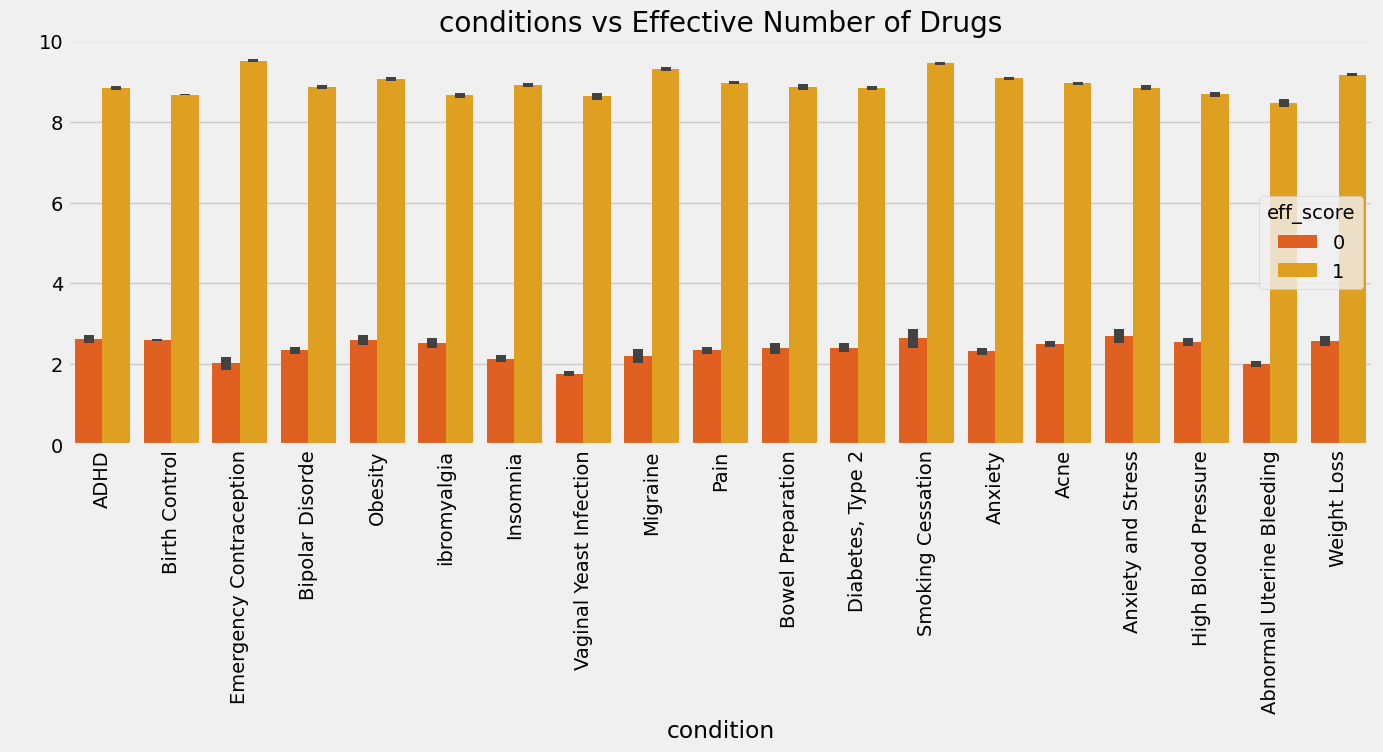

In [25]:
#lets check this in Graph

popular_conditions = ('Birth Control','Depresion','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss','Obesity','ADHD','Diabetes, Type 2','Emergency Contraception','High Blood Pressure','Vaginal Yeast Infection','Abnormal Uterine Bleeding','Bowel Preparation','ibromyalgia','Smoking Cessation','Migraine','Anxiety and Stress')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot(x= conditions['condition'],y = conditions['rating'],hue = data['eff_score'],
           palette = 'autumn')
plt.title('conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()


In [26]:
#lets remove all the Duplicates from the Dataset
data = data.drop_duplicates()


In [27]:
#Lets find the highest and lowest rated drugs for each condition

@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition']== condition ][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                                                     ascending = False).head().reset_index(drop=True))
    print("\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                                                   ascending=True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…